In [1]:
# Importing the necessary libraries for EDA and Data visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import pickle

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading of the csv file
df = pd.read_csv("train_u6lujuX_CVtuZ9i.csv") # reading the csv data file into a dataframe

In [3]:
# Display the dataset
df.head(10) # Displays the top Specified number of columns given in head function of the dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.shape

(614, 13)

In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
# Dropping of column which is irrelevant from the dataset
df.drop("Loan_ID", axis=1, inplace=True) # drop function is used to drop data from the table

In [8]:
# Creating a loop for checking the number of value counts in each column
for col in df: # col is a variable used in for loop for iterating through the df dataframe
  print(col) # prints the column name
  print(df[col].value_counts()) # gives the value counts of the column

Gender
Male      489
Female    112
Name: Gender, dtype: int64
Married
Yes    398
No     213
Name: Married, dtype: int64
Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64
ApplicantIncome
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64
CoapplicantIncome
0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64
LoanAmount
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64
Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0  

In [9]:
# Replacing the null values present in these columns with the mode of that particular column using fillna 
df['LoanAmount'] = df['LoanAmount'].fillna( df['LoanAmount'].mode().values[0])
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna( df['Loan_Amount_Term'].mode().values[0])
df['Credit_History'] = df['Credit_History'].fillna( df['Credit_History'].mode().values[0])
df['Gender'] = df['Gender'].fillna( df['Gender'].mode().values[0])
df['Married'] = df['Married'].fillna( df['Married'].mode().values[0])
df['Dependents'] = df['Dependents'].fillna( df['Dependents'].mode().values[0])
df['Self_Employed'] = df['Self_Employed'].fillna( df['Self_Employed'].mode().values[0])

In [10]:
# Checking null values present using isnull function
df.isnull().sum() # Here sum is used to give the total number of null values present in each column

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

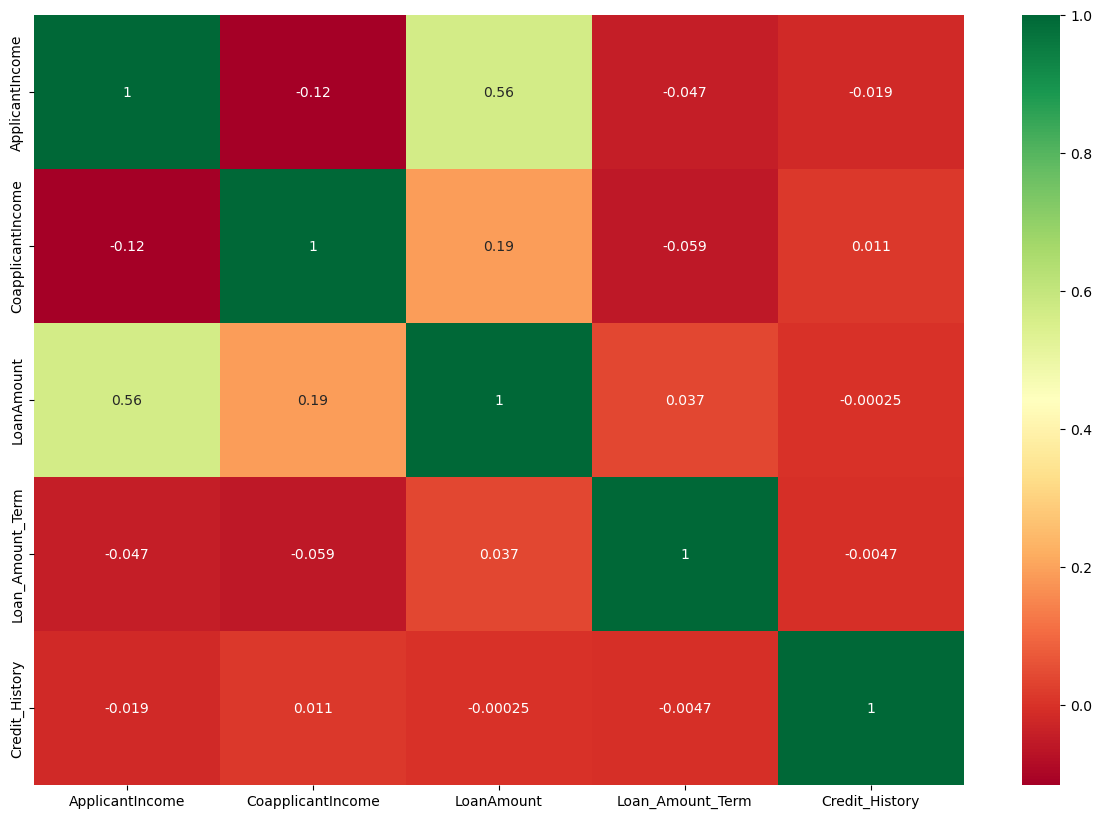

In [11]:
# Plotting The correlation matrix for checking feature importance of the dataset using df_new.corr fiunction
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap="RdYlGn", annot=True)
plt.show()

In [12]:
# Splitting the dataset into Categorical data and numeric data using select_dtypes function
df_num = df.select_dtypes(["int64","float64"]) # Assigning df_num to contain all the numeric datatype columns
df_cat = df.select_dtypes(object) #  Assigning df_cat to contain all the object datatype columns

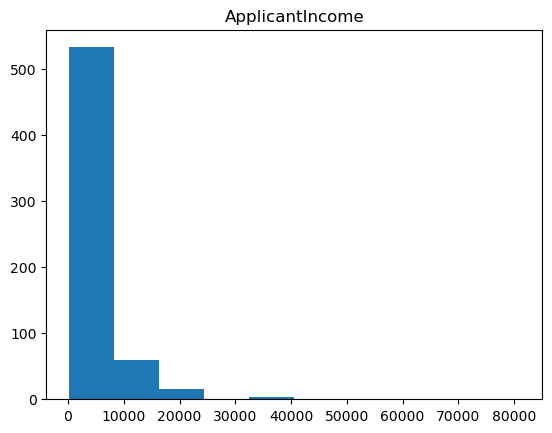

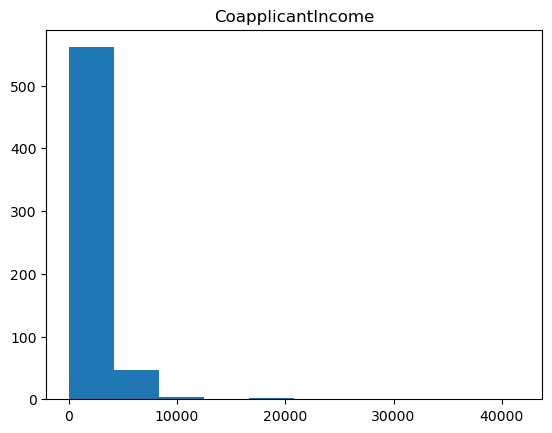

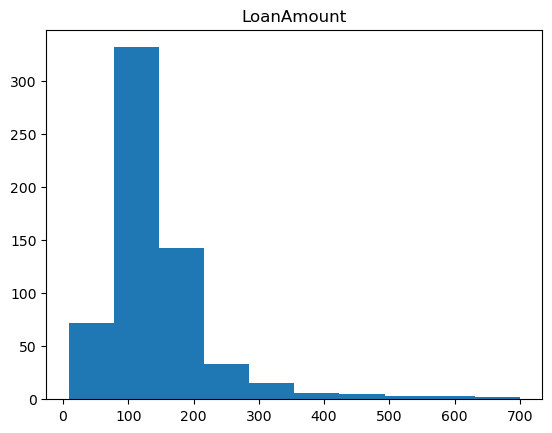

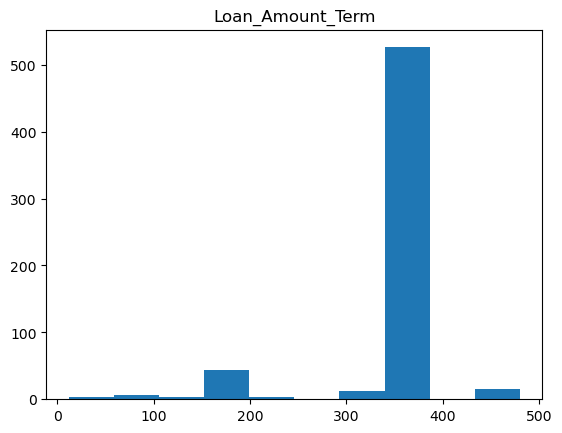

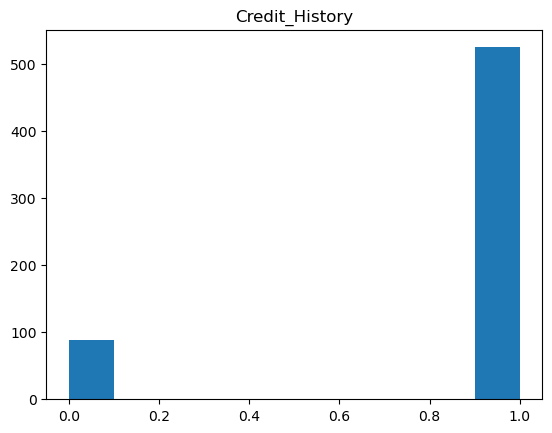

In [13]:
# Creating a loop for displaying histograms of numerical columns present
for col in df_num: 
  plt.hist(df_num[col]) # Plot histogram of the given column
  plt.title(col) # Display the column name in the title
  plt.show() # to display all the graphs

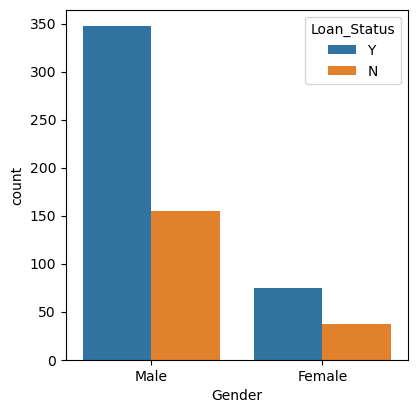

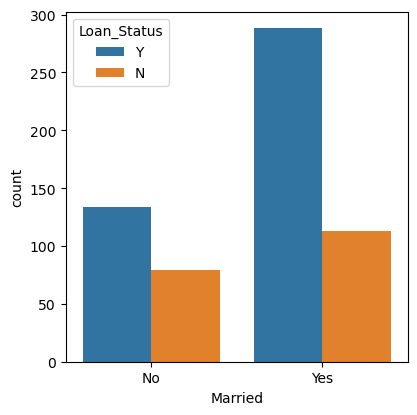

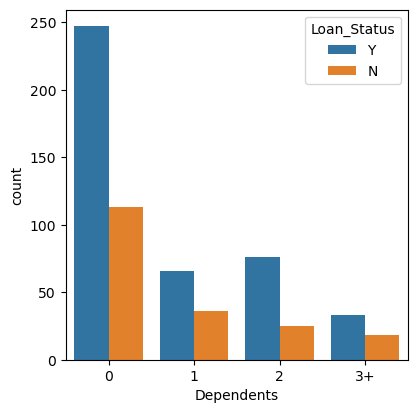

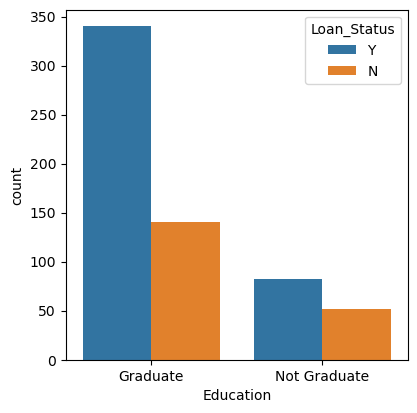

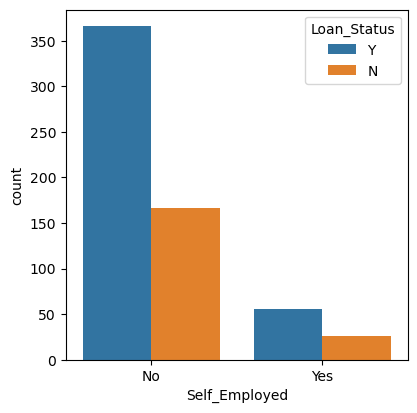

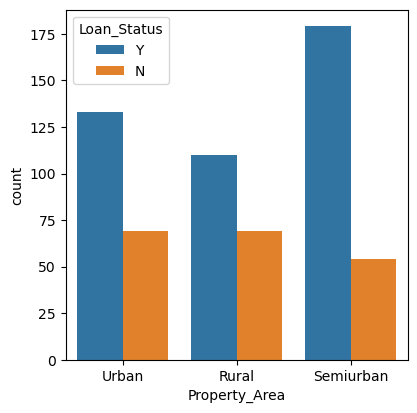

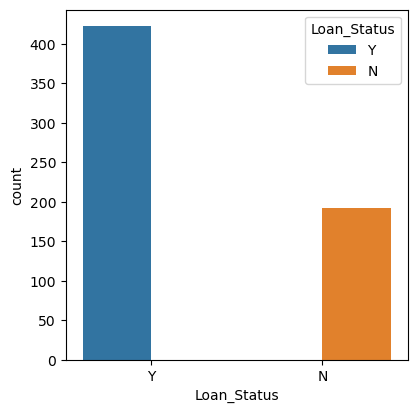

In [14]:
# Creation of loop for displaying graphs of categorical datatype
for col in df_cat[:-1]: # here :-1 means that the last column i.e the o\p column is excluded
  plt.figure(figsize=(15,10)) # figsize allows us to manipulate dimensions of the figures
  plt.subplot(2,3,1) # Subplot helps to define the graphs position using rows, columns and index
  sns.countplot(x=col, hue="Loan_Status", data= df_cat) #x= data column, hue= Loan approval for that column
  plt.xlabel(col)

<AxesSubplot:xlabel='ApplicantIncome'>

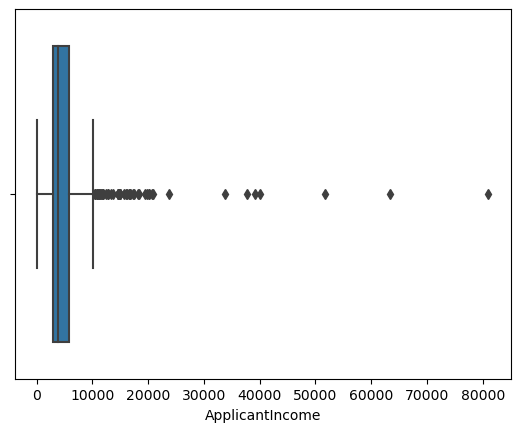

In [15]:
# Plotting box plots to check the outliers present in the data
sns.boxplot(df["ApplicantIncome"])

<AxesSubplot:xlabel='CoapplicantIncome'>

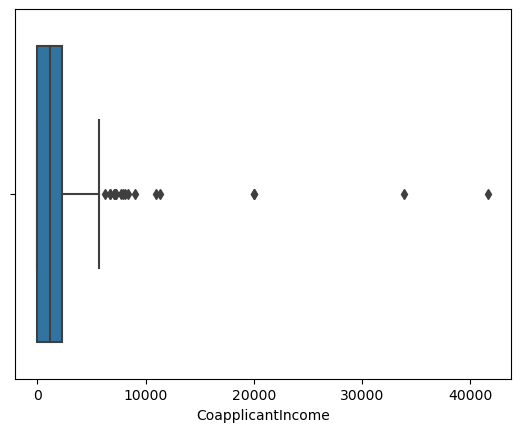

In [16]:
sns.boxplot(df["CoapplicantIncome"])

<AxesSubplot:xlabel='LoanAmount'>

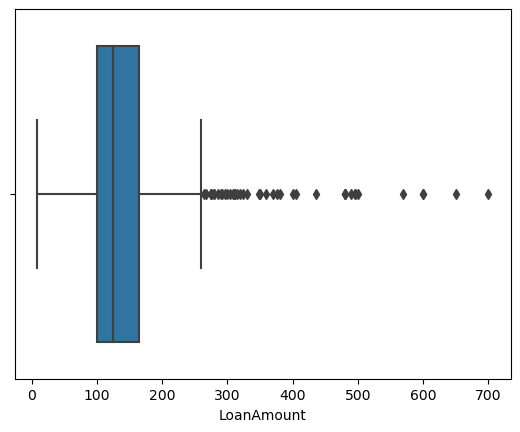

In [17]:
sns.boxplot(df["LoanAmount"])

In [18]:
category_col =['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']  
labelEncoder = preprocessing.LabelEncoder() 
mapping_dict ={} 
for col in category_col: 
    df[col] = labelEncoder.fit_transform(df[col]) 
  
    le_name_mapping = dict(zip(labelEncoder.classes_, 
                        labelEncoder.transform(labelEncoder.classes_))) 
  
    mapping_dict[col]= le_name_mapping 
print(mapping_dict) 

{'Gender': {'Female': 0, 'Male': 1}, 'Married': {'No': 0, 'Yes': 1}, 'Dependents': {'0': 0, '1': 1, '2': 2, '3+': 3}, 'Education': {'Graduate': 0, 'Not Graduate': 1}, 'Self_Employed': {'No': 0, 'Yes': 1}, 'Credit_History': {0.0: 0, 1.0: 1}, 'Property_Area': {'Rural': 0, 'Semiurban': 1, 'Urban': 2}, 'Loan_Status': {'N': 0, 'Y': 1}}


In [19]:
# Importing Libraries for ML Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Importing Library fror splitting the training and testing data
from sklearn.model_selection import train_test_split, cross_val_score

# Importing Libraries for providing performance value of the ML algorithms
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score # importing the library for creating roc curve graph
from sklearn.preprocessing import binarize
from sklearn.model_selection import GridSearchCV

In [20]:
X = df.drop('Loan_Status', axis = 1) 
Y = df['Loan_Status']

In [21]:
x_train, x_test, y_train, y_test= train_test_split(X,Y, test_size=0.25, random_state= 1) # Breaking up the data for training and testing, testing size set to 30%

In [22]:
# Declaring Objects for various classification algorithms being used 
Dt= DecisionTreeClassifier()
Rf= RandomForestClassifier()
Lg= LogisticRegression()

In [23]:
#Creating a model function to pass all the classification algorithms for fitting and prediciting over the dataset as well as providing the classification report, accuracy of said models
def mymodel(model): # Defining the function name along with the parameters
  model.fit(x_train,y_train) # Fitting the model over the training dataset
  ypred=model.predict(x_test) # Predicting the output for the testing dataset
  print("Testing Report\n")
  print(classification_report(y_test, ypred)) # Prediction summary of the model
  acc= accuracy_score(ypred,y_test) # Accuracy Score
  print(f"Accuracy:{acc}")
  ypred_1= model.predict(x_train)# Predicting the output for the training dataset
  print("Training Report\n")
  print(classification_report(y_train, ypred_1))
  acc_1= accuracy_score(ypred_1,y_train)
  print(f"Accuracy:{acc_1}")
  print("ROC AUC Score: ", roc_auc_score(y_test, ypred))
  fp, tp, threshold = roc_curve(y_test, ypred)
  print("Threshold:", threshold)
  return model

In [24]:
mymodel(Dt) # Fitting and testing the DecisionTreeClassifier

Testing Report

              precision    recall  f1-score   support

           0       0.50      0.49      0.49        49
           1       0.76      0.77      0.77       105

    accuracy                           0.68       154
   macro avg       0.63      0.63      0.63       154
weighted avg       0.68      0.68      0.68       154

Accuracy:0.6818181818181818
Training Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       143
           1       1.00      1.00      1.00       317

    accuracy                           1.00       460
   macro avg       1.00      1.00      1.00       460
weighted avg       1.00      1.00      1.00       460

Accuracy:1.0
ROC AUC Score:  0.6306122448979592
Threshold: [2 1 0]


DecisionTreeClassifier()

In [25]:
mymodel(Rf) # Fitting and testing the DecisionTreeClassifier

Testing Report

              precision    recall  f1-score   support

           0       0.69      0.41      0.51        49
           1       0.77      0.91      0.83       105

    accuracy                           0.75       154
   macro avg       0.73      0.66      0.67       154
weighted avg       0.74      0.75      0.73       154

Accuracy:0.7532467532467533
Training Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       143
           1       1.00      1.00      1.00       317

    accuracy                           1.00       460
   macro avg       1.00      1.00      1.00       460
weighted avg       1.00      1.00      1.00       460

Accuracy:1.0
ROC AUC Score:  0.6612244897959183
Threshold: [2 1 0]


RandomForestClassifier()

In [26]:
mymodel(Lg) # Fitting and testing the DecisionTreeClassifier

Testing Report

              precision    recall  f1-score   support

           0       0.83      0.39      0.53        49
           1       0.77      0.96      0.86       105

    accuracy                           0.78       154
   macro avg       0.80      0.67      0.69       154
weighted avg       0.79      0.78      0.75       154

Accuracy:0.7792207792207793
Training Report

              precision    recall  f1-score   support

           0       0.93      0.46      0.62       143
           1       0.80      0.98      0.88       317

    accuracy                           0.82       460
   macro avg       0.87      0.72      0.75       460
weighted avg       0.84      0.82      0.80       460

Accuracy:0.8217391304347826
ROC AUC Score:  0.6748299319727891
Threshold: [2 1 0]


LogisticRegression()

In [27]:
# hperparameter tuning for Decision Tree to find the best fit for max_depth
for i in range(1,50): # here i will iterate through the range displayed 
  Dt1= DecisionTreeClassifier(criterion="entropy", max_depth=i) # max_depth allows to limit the depth of the tree to reduce overfitting
  Dt1.fit(x_train,y_train)
  ypred= Dt1.predict(x_test)
  print(f"{i}: {accuracy_score(y_test,ypred)}") # Show all the accuracy result after implementing the loop
 

1: 0.7922077922077922
2: 0.7857142857142857
3: 0.7727272727272727
4: 0.7727272727272727
5: 0.7662337662337663
6: 0.7467532467532467
7: 0.7532467532467533
8: 0.7077922077922078
9: 0.6948051948051948
10: 0.6623376623376623
11: 0.6363636363636364
12: 0.6688311688311688
13: 0.6623376623376623
14: 0.6623376623376623
15: 0.6558441558441559
16: 0.6688311688311688
17: 0.6883116883116883
18: 0.7012987012987013
19: 0.6818181818181818
20: 0.6688311688311688
21: 0.6623376623376623
22: 0.6688311688311688
23: 0.6558441558441559
24: 0.6688311688311688
25: 0.6753246753246753
26: 0.7012987012987013
27: 0.6623376623376623
28: 0.6883116883116883
29: 0.6753246753246753
30: 0.6688311688311688
31: 0.6688311688311688
32: 0.6883116883116883
33: 0.6688311688311688
34: 0.6688311688311688
35: 0.6623376623376623
36: 0.6688311688311688
37: 0.6753246753246753
38: 0.6558441558441559
39: 0.6688311688311688
40: 0.6818181818181818
41: 0.6688311688311688
42: 0.6428571428571429
43: 0.6753246753246753
44: 0.66883116883116

In [28]:
for i in range(1,50):
  Dt2= DecisionTreeClassifier(criterion="gini", min_samples_leaf=i) # min_samples_leaf allows us to limit the number of samples at leaf node to reduce overfitting
  Dt2.fit(x_train,y_train)
  ypred= Dt2.predict(x_test)
  print(f"{i}: {accuracy_score(y_test,ypred)}")

1: 0.6558441558441559
2: 0.6753246753246753
3: 0.6948051948051948
4: 0.6753246753246753
5: 0.6168831168831169
6: 0.6688311688311688
7: 0.6883116883116883
8: 0.6818181818181818
9: 0.7727272727272727
10: 0.7402597402597403
11: 0.7532467532467533
12: 0.7662337662337663
13: 0.7662337662337663
14: 0.7922077922077922
15: 0.7922077922077922
16: 0.7922077922077922
17: 0.7922077922077922
18: 0.7857142857142857
19: 0.7857142857142857
20: 0.7857142857142857
21: 0.7922077922077922
22: 0.7922077922077922
23: 0.7922077922077922
24: 0.7922077922077922
25: 0.7922077922077922
26: 0.7922077922077922
27: 0.7922077922077922
28: 0.7922077922077922
29: 0.7922077922077922
30: 0.7922077922077922
31: 0.7922077922077922
32: 0.7922077922077922
33: 0.7922077922077922
34: 0.7922077922077922
35: 0.7922077922077922
36: 0.7922077922077922
37: 0.7922077922077922
38: 0.7922077922077922
39: 0.7922077922077922
40: 0.7922077922077922
41: 0.7922077922077922
42: 0.7922077922077922
43: 0.7922077922077922
44: 0.79220779220779

In [29]:
Dt1= DecisionTreeClassifier(max_depth=1, criterion="entropy", min_samples_leaf=21) # entropy and gini  are the criteria used to measure the quality of a split
mymodel(Dt1) # Fitting the variable to the custom function created

Testing Report

              precision    recall  f1-score   support

           0       0.90      0.39      0.54        49
           1       0.77      0.98      0.87       105

    accuracy                           0.79       154
   macro avg       0.84      0.68      0.70       154
weighted avg       0.82      0.79      0.76       154

Accuracy:0.7922077922077922
Training Report

              precision    recall  f1-score   support

           0       0.93      0.44      0.60       143
           1       0.80      0.98      0.88       317

    accuracy                           0.82       460
   macro avg       0.86      0.71      0.74       460
weighted avg       0.84      0.82      0.79       460

Accuracy:0.8152173913043478
ROC AUC Score:  0.6843537414965986
Threshold: [2 1 0]


DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=21)

In [30]:
Dt2= DecisionTreeClassifier(max_depth=1, criterion="gini", min_samples_leaf=21)
mymodel(Dt2)

Testing Report

              precision    recall  f1-score   support

           0       0.90      0.39      0.54        49
           1       0.77      0.98      0.87       105

    accuracy                           0.79       154
   macro avg       0.84      0.68      0.70       154
weighted avg       0.82      0.79      0.76       154

Accuracy:0.7922077922077922
Training Report

              precision    recall  f1-score   support

           0       0.93      0.44      0.60       143
           1       0.80      0.98      0.88       317

    accuracy                           0.82       460
   macro avg       0.86      0.71      0.74       460
weighted avg       0.84      0.82      0.79       460

Accuracy:0.8152173913043478
ROC AUC Score:  0.6843537414965986
Threshold: [2 1 0]


DecisionTreeClassifier(max_depth=1, min_samples_leaf=21)

In [31]:
feature_importance_df = pd.DataFrame(x_train.columns, columns=["Feature"])
feature_importance_df["Importance"] = Rf.feature_importances_
feature_importance_df.sort_values('Importance', ascending=False, inplace=True)
feature_importance_df = feature_importance_df.head(20)
feature_importance_df

,Feature,Importance
9,Credit_History,0.280136
5,ApplicantIncome,0.195151
7,LoanAmount,0.178423
6,CoapplicantIncome,0.119347
2,Dependents,0.047205
8,Loan_Amount_Term,0.046875
10,Property_Area,0.046513
1,Married,0.025225
3,Education,0.023474
4,Self_Employed,0.022067


Text(0.5, 1.0, 'Plot Feature Importances')

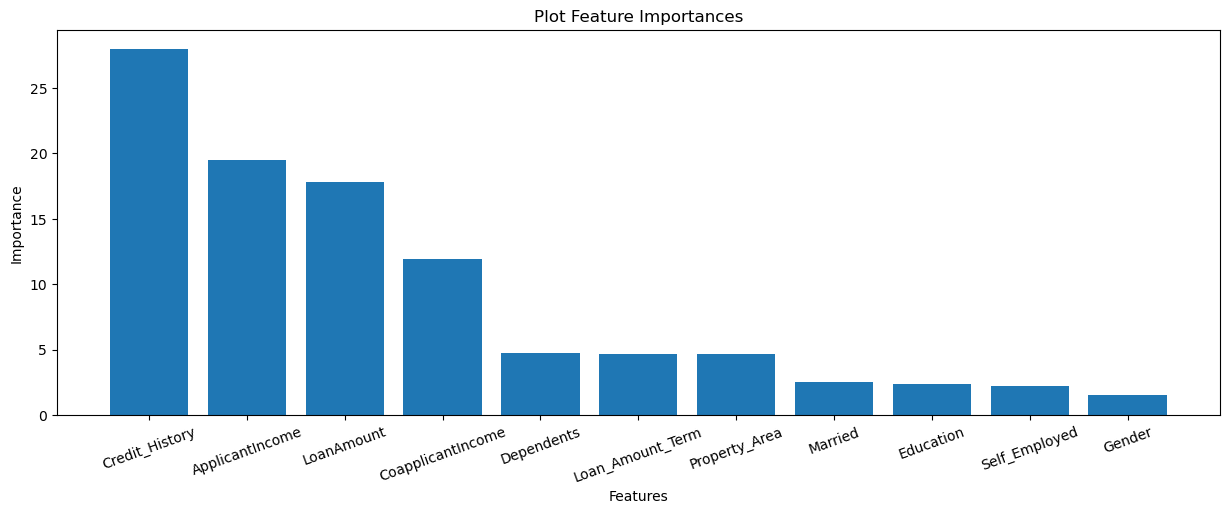

In [32]:
plt.figure(figsize=(15,5))
ax = feature_importance_df['Feature']
plt.bar(range(feature_importance_df.shape[0]), feature_importance_df['Importance']*100)
plt.xticks(range(feature_importance_df.shape[0]), feature_importance_df['Feature'], rotation = 20)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Plot Feature Importances")

In [33]:
pickle_out = open("model1.pkl", "wb")
pickle.dump(Dt1, pickle_out)
pickle_out.close()